In [1]:
import sys
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
from scipy import interpolate
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
from scipy import signal
import copy as cp
import pandas as pd
import pickle

In [2]:
def get_peaks(y):
    indices = signal.argrelextrema(y, np.greater)[0]
    y_peaks = y[indices]
    y_sorted = np.flip(np.sort(y_peaks))
    indices = indices[np.flip(np.argsort(y_peaks))]
    # y_sorted = np.flip(np.sort(y)[-number:])
    # indices = np.flip(np.argsort(y)[-number:])
    return y_sorted, indices

def check_for_other_signals(obs, name_estimator, max_m=4, max_n=2):
    x = obs.periodicity_detector.results_frequency[name_estimator]
    dx = x[1]-x[0]
    
    y = obs.periodicity_detector.results_power[name_estimator]
    peaks, idx_peaks = get_peaks(y)
    x_peaks = x[idx_peaks]
    
    
    main_peak, main_peak_freq = peaks[0], x_peaks[0]
    secondary_peaks, secondary_peaks_freq = peaks[1:], x_peaks[1:]
    
    check_peaks = []
    for m in np.arange(max_m+1)[2:]:
        F = main_peak_freq/m
        for i, f in enumerate(secondary_peaks_freq):
            if (F-dx <= f <= F+dx):
                check_peaks.append(('m', m, i, f, secondary_peaks[i]))
                
    for n in np.arange(max_n)[1:]:
        Fpos = main_peak_freq + n
        Fneg = main_peak_freq - n
        for i, f in enumerate(secondary_peaks_freq):
            if (Fpos-dx <= f <= Fpos+dx):
                check_peaks.append(('n+', n, i, f, secondary_peaks[i]))
            if (Fneg-dx <= f <= Fneg+dx):
                check_peaks.append(('n-', n, i, f, secondary_peaks[i]))     
    
    print(f'Main Peak:\n\tPower: {main_peak}\n\tFreq: {main_peak_freq}\n\tPeriod: {1./main_peak_freq}')
    if check_peaks != []:
        print(check_peaks)
    else:
        print("No problems found!")
        
    return main_peak, main_peak_freq, check_peaks, secondary_peaks, secondary_peaks_freq

## BG Crucis

5600-5800 $\AA$

Main Peak:
	Power: 0.5790900822007575
	Freq: 0.3324615384615382
	Period: 3.0078667283664995
[('m', 2, 16, 0.166153846153846, 0.10776609206457587), ('m', 3, 39, 0.11076923076923069, 0.04637085515902324), ('m', 4, 102, 0.08307692307692303, 0.025485308379281656)]
Main Peak:
	Power: 0.4353382240643836
	Freq: 0.299230769230769
	Period: 3.341902313624681
[('m', 2, 9, 0.14953846153846143, 0.07839224254574968), ('m', 3, 20, 0.09969230769230762, 0.040980697143760285), ('m', 4, 59, 0.07476923076923073, 0.016629990037253895)]


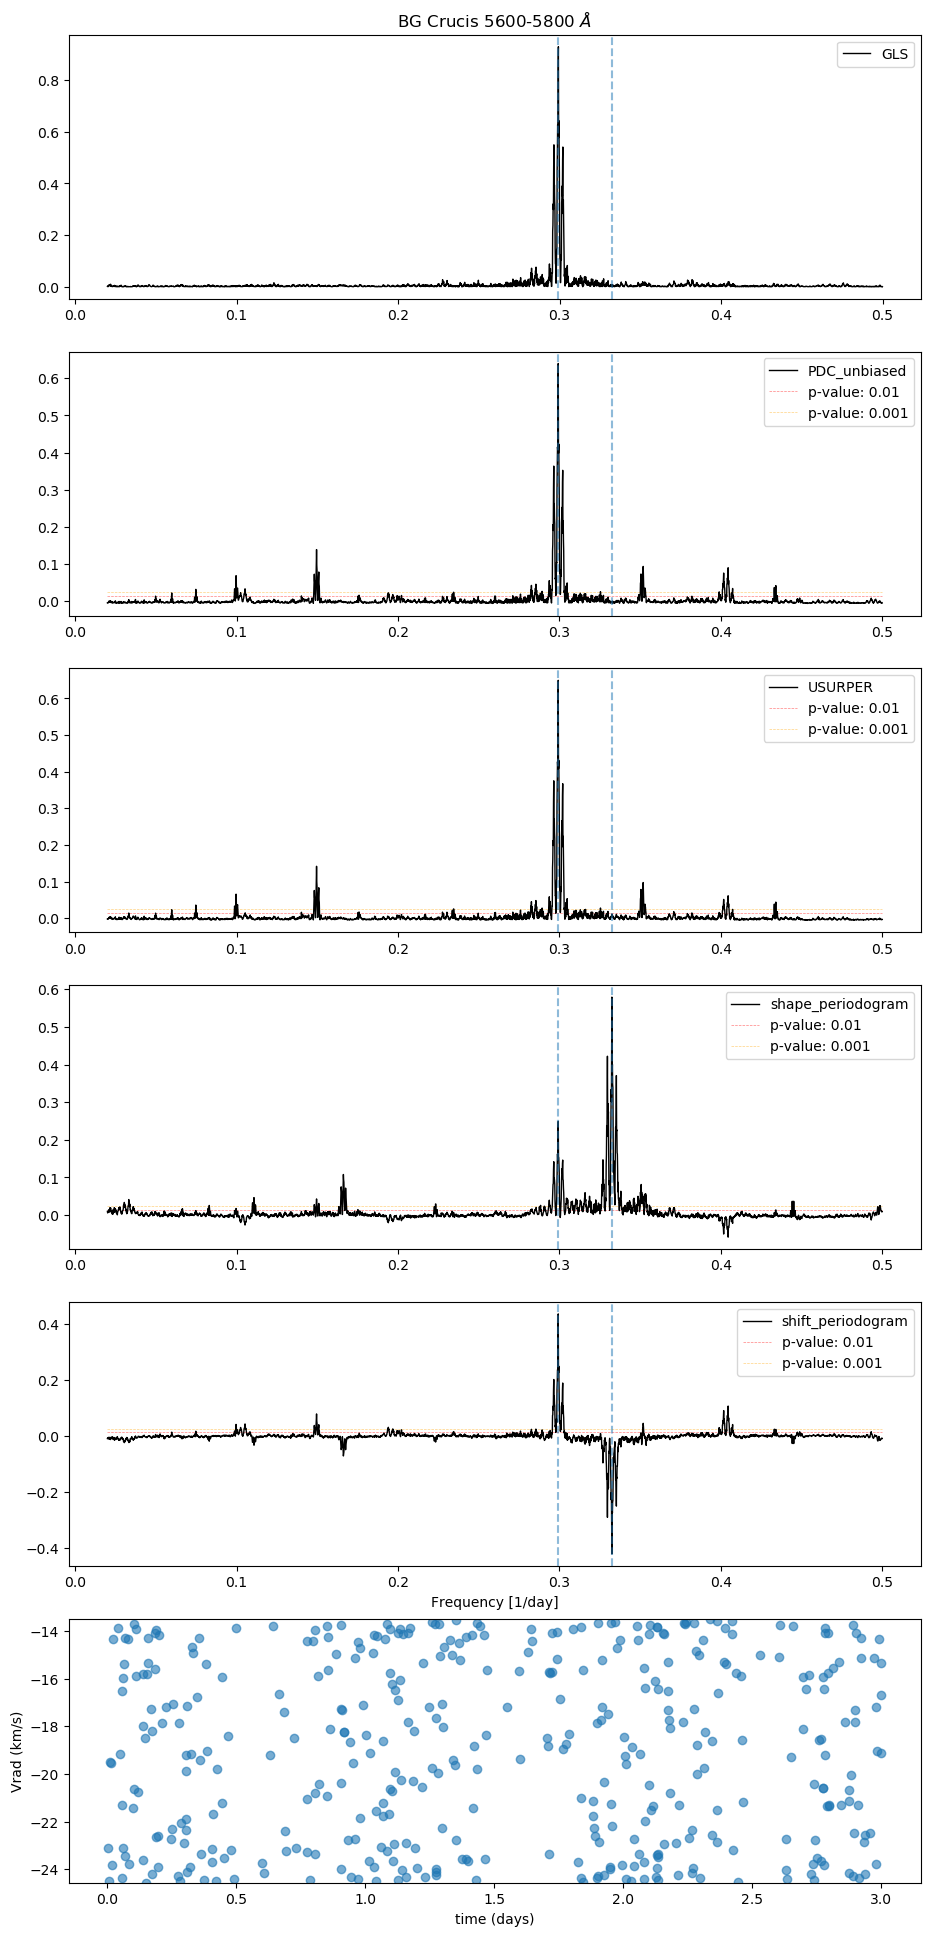

In [3]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\BGCru5600_5800.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape, main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"BG Crucis 5600-5800 $\AA$")
plt.show()

5800-6000

Main Peak:
	Power: 0.14495617265554897
	Freq: 0.3046153846153844
	Period: 3.282828282828285
[('m', 2, 38, 0.15230769230769217, 0.03423564070504207), ('m', 3, 89, 0.10153846153846148, 0.020661400332553984), ('m', 4, 288, 0.07615384615384611, 0.007154448869728267)]
Main Peak:
	Power: 0.2629805057249463
	Freq: 0.299230769230769
	Period: 3.341902313624681
[('m', 2, 5, 0.14953846153846143, 0.04803066209194789), ('m', 3, 27, 0.09969230769230762, 0.016676101299718023), ('m', 4, 70, 0.07476923076923073, 0.006971928441229828)]


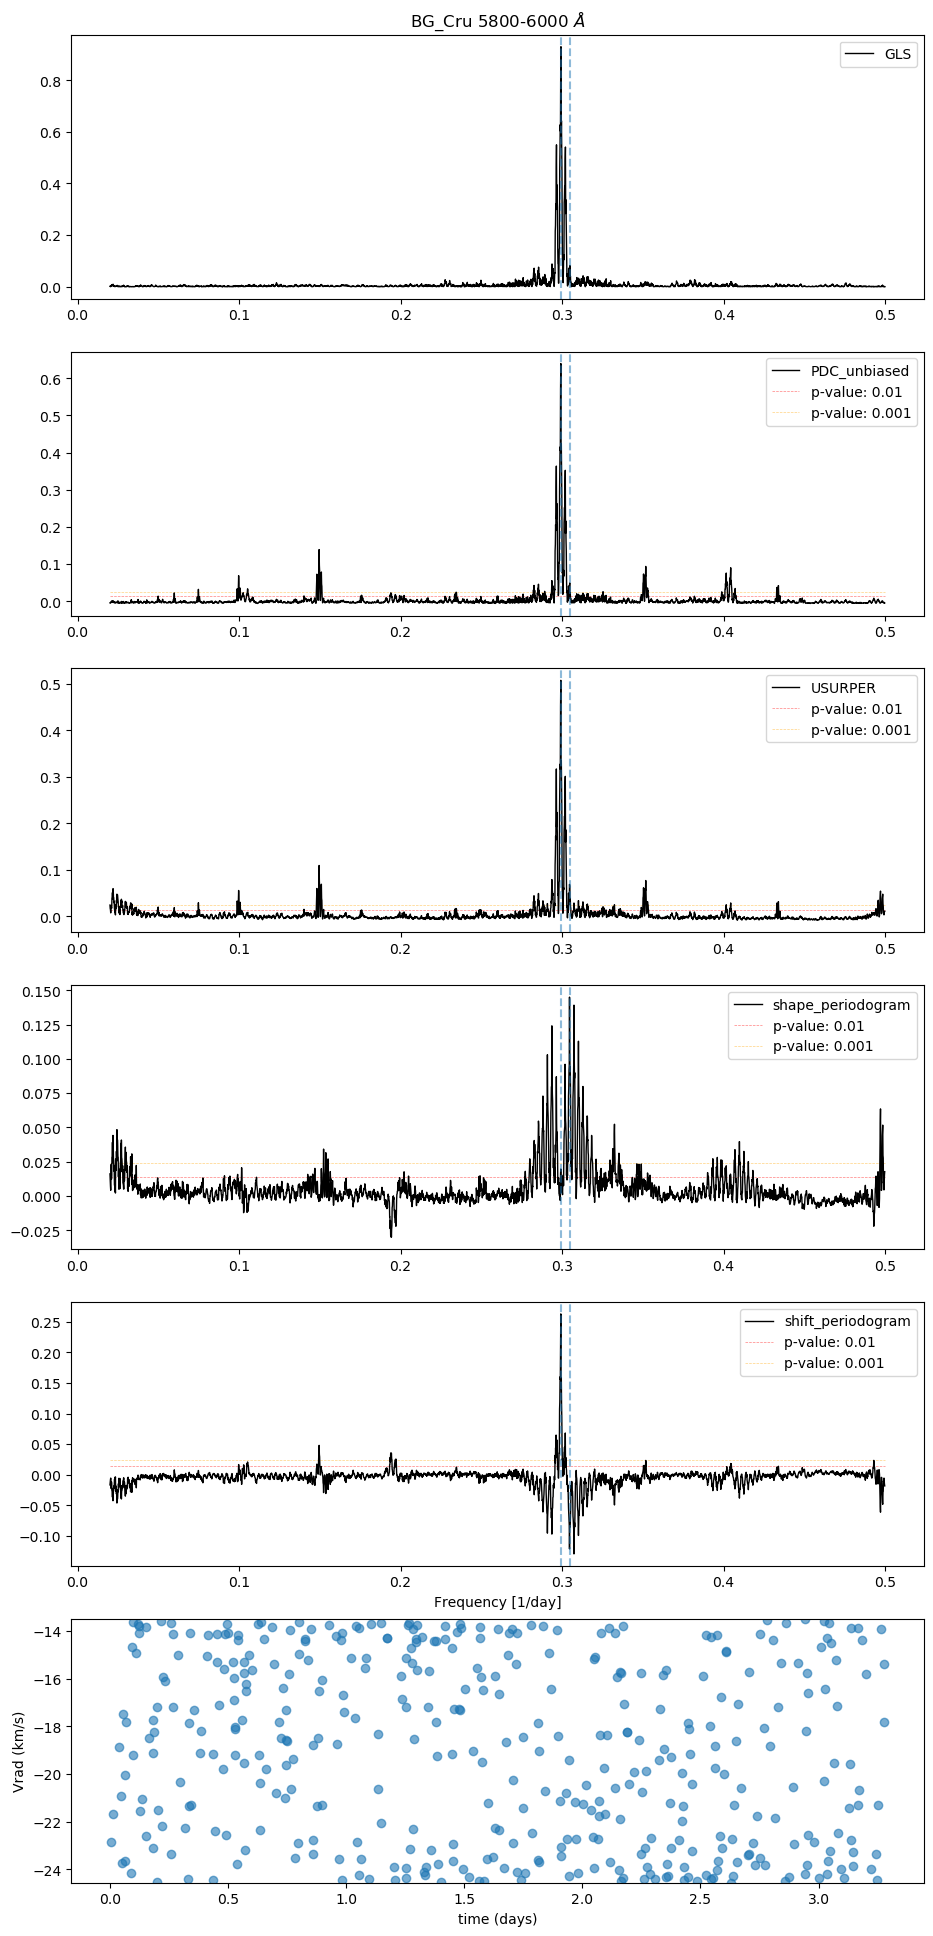

In [8]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\BGCru5800_6000.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape,main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"BG_Cru 5800-6000 $\AA$")
plt.show()

# QZ Normae

5600-5800 $\AA$

Main Peak:
	Power: 0.3092299758384099
	Freq: 0.26415384615384596
	Period: 3.785672684915553
[('m', 2, 14, 0.1319999999999999, 0.060559270940290816), ('m', 3, 31, 0.08799999999999995, 0.03184150005350292), ('m', 4, 121, 0.06599999999999996, 0.013803048265694918)]
Main Peak:
	Power: 0.5212379127040095
	Freq: 0.26415384615384596
	Period: 3.785672684915553
[('m', 2, 4, 0.1319999999999999, 0.12341262140892965), ('m', 3, 29, 0.08799999999999995, 0.05421651535328119), ('m', 4, 82, 0.06599999999999996, 0.029848094099525387)]


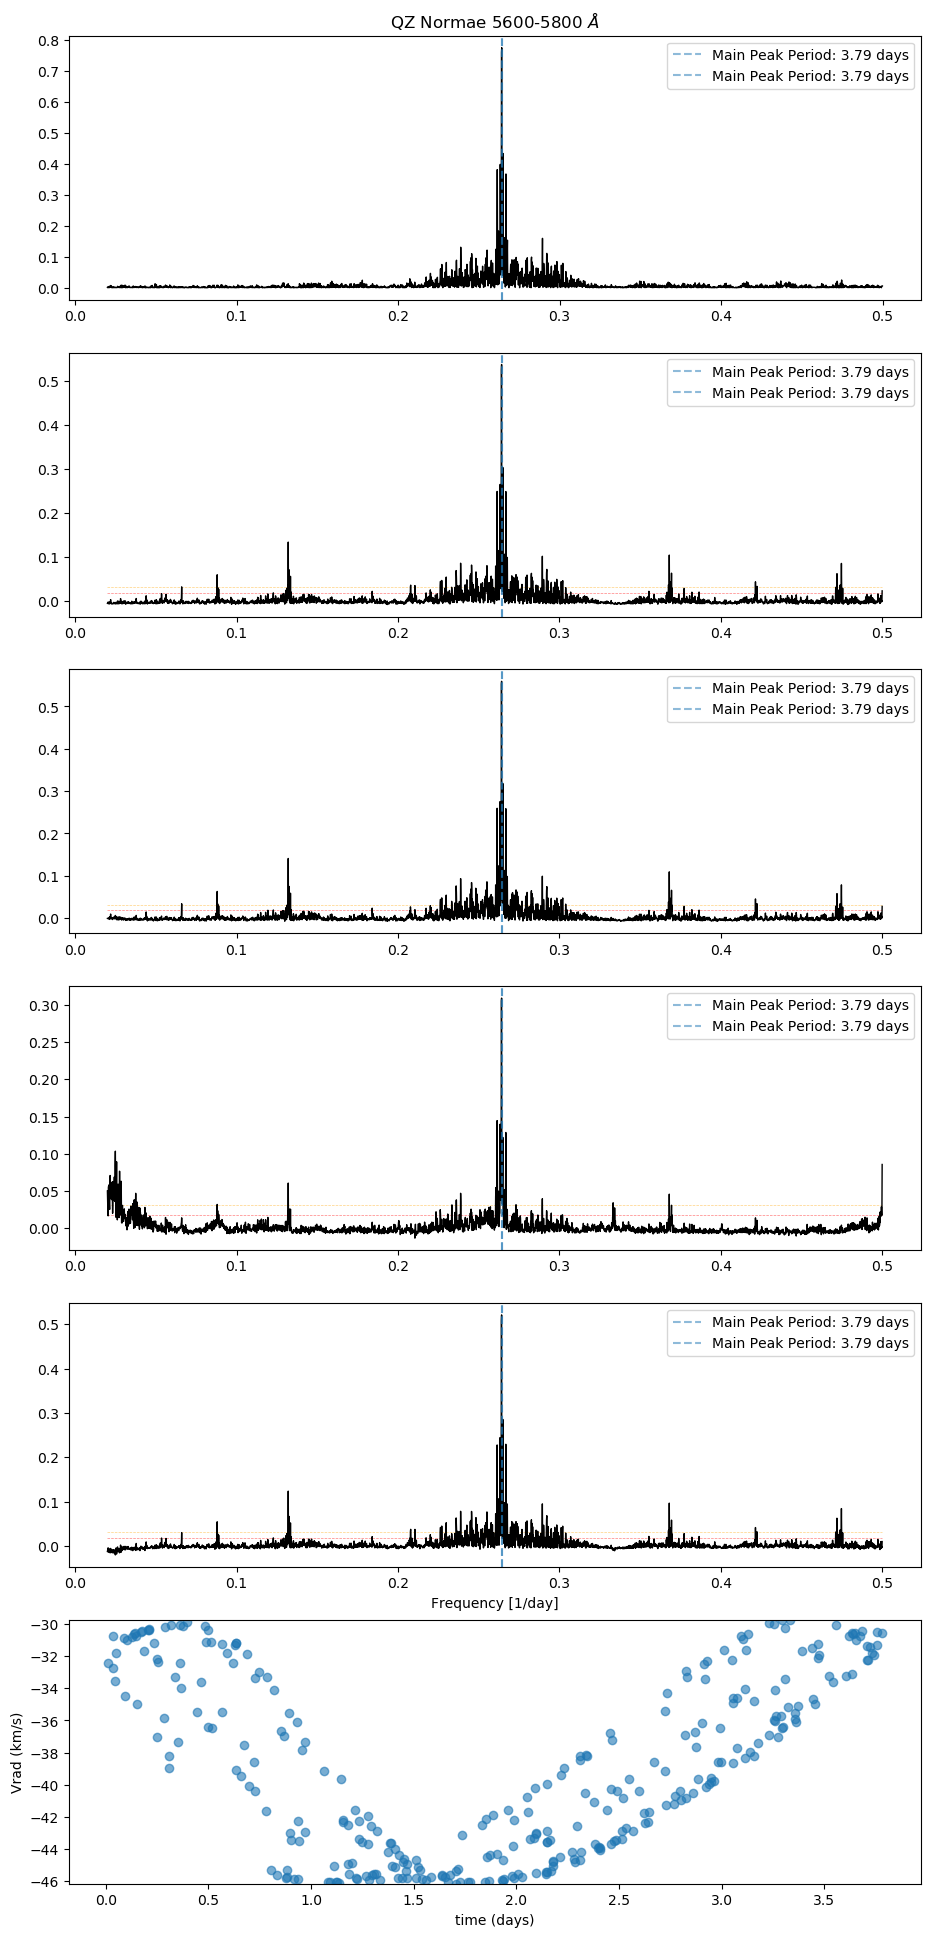

In [7]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\QZNor5600_5800.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape, main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"QZ Normae 5600-5800 $\AA$")
plt.show()

5800-6000 $\AA$

Main Peak:
	Power: 0.23889106853867506
	Freq: 0.26415384615384596
	Period: 3.785672684915553
[('m', 2, 24, 0.1319999999999999, 0.03886093379056412), ('m', 3, 104, 0.08799999999999995, 0.018816006955036154), ('m', 4, 167, 0.06599999999999996, 0.01406572601182715)]
Main Peak:
	Power: 0.03258101169602731
	Freq: 0.2649230769230767
	Period: 3.7746806039489
[('m', 2, 31, 0.13246153846153835, 0.014209766282973765), ('m', 3, 706, 0.08830769230769225, 0.0010914405690336667), ('m', 4, 817, 0.06615384615384612, -0.0015920236809103107)]


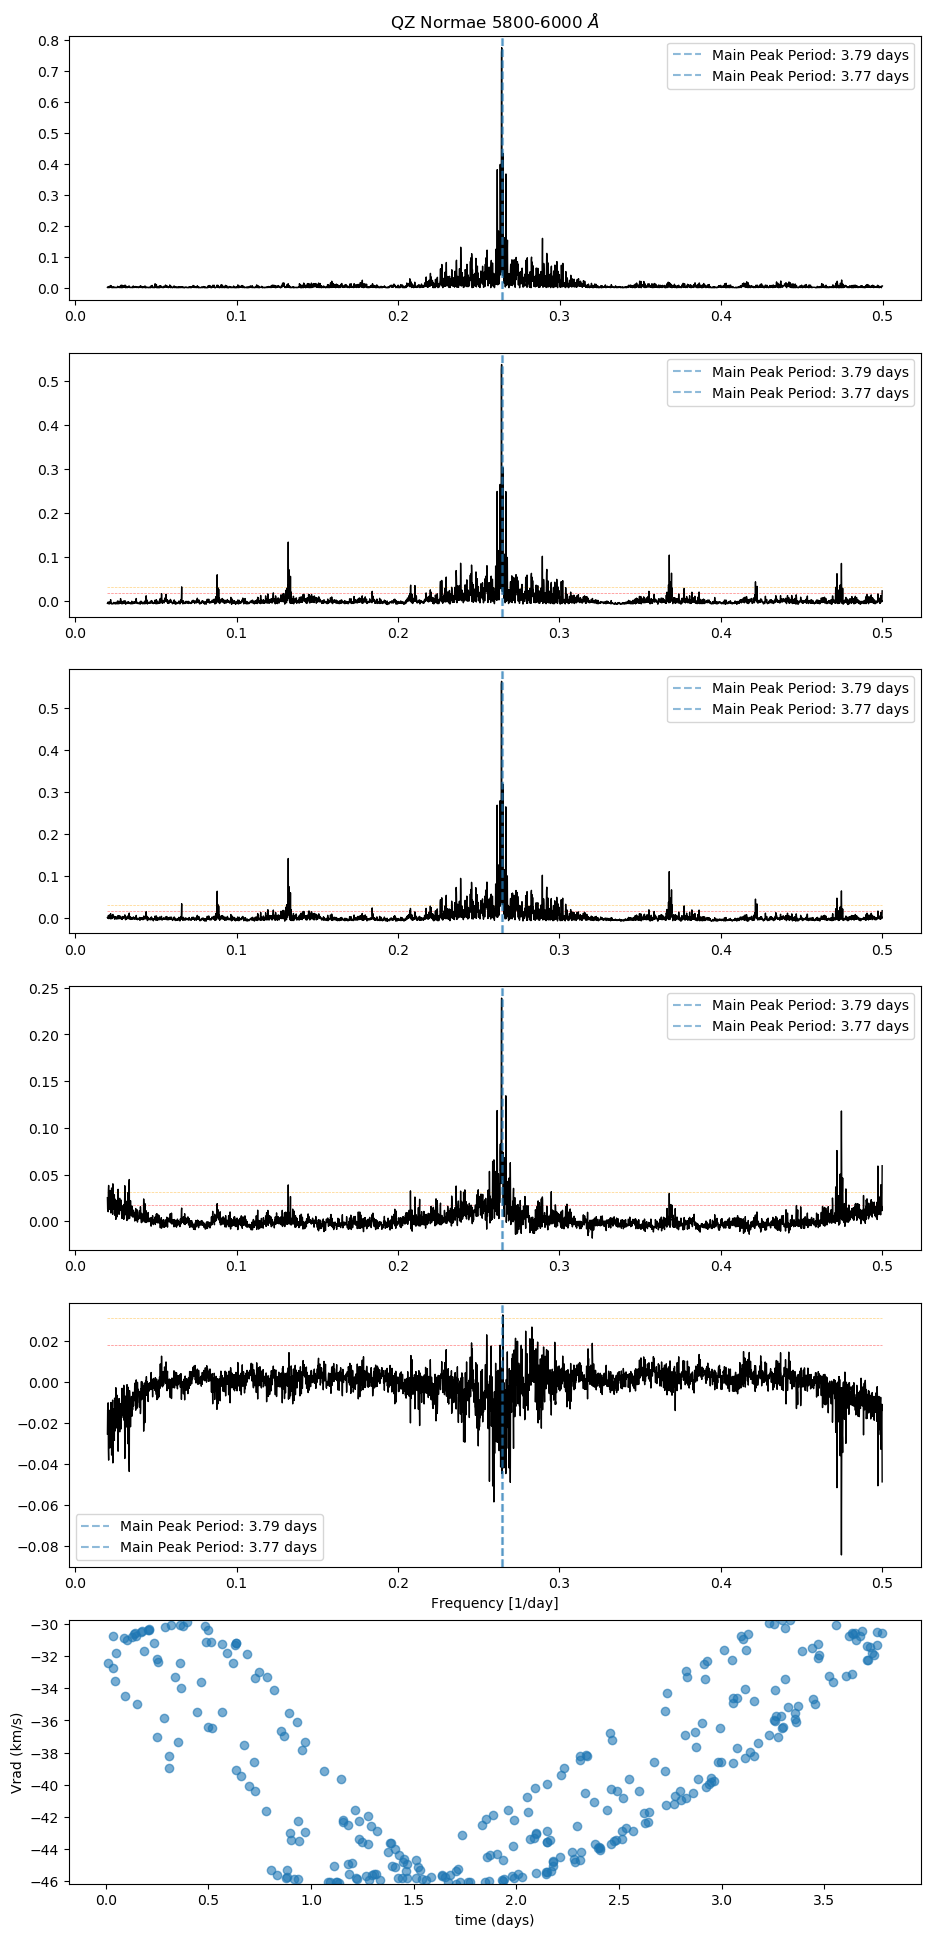

In [8]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\QZNor5800_6000.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape, main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"QZ Normae 5800-6000 $\AA$")
plt.show()

# V0391 Normae

5600-5800 $\AA$

Main Peak:
	Power: 0.5854611715827178
	Freq: 0.22861538461538441
	Period: 4.374158815612386
[('m', 2, 48, 0.11430769230769224, 0.07323426707859335), ('m', 3, 75, 0.07615384615384611, 0.04864327442452387), ('m', 4, 331, 0.05707692307692305, -0.015238789656353587)]
Main Peak:
	Power: 0.7380674330760156
	Freq: 0.22861538461538441
	Period: 4.374158815612386
[('m', 2, 20, 0.11430769230769224, 0.14076094234073383), ('m', 3, 107, 0.07615384615384611, 0.037270418631767735), ('m', 4, 157, 0.057230769230769196, 0.020402673559340643)]


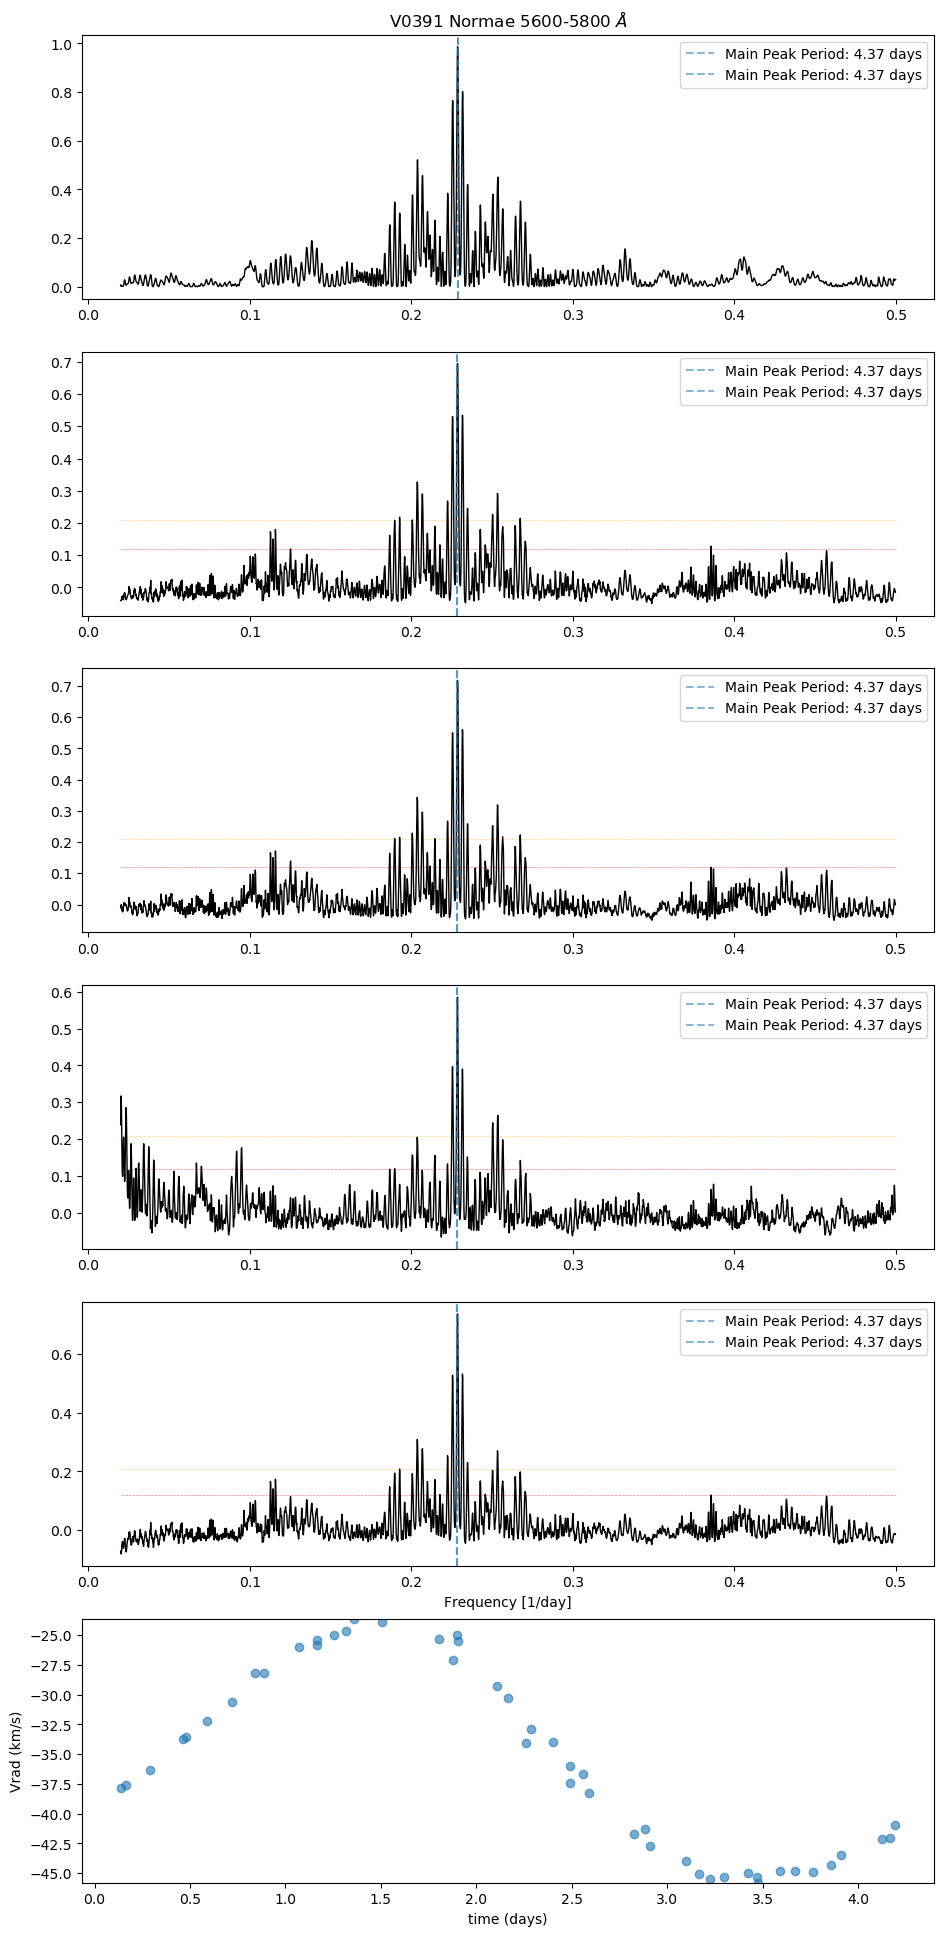

In [9]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\V03915600_5800.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape, main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"V0391 Normae 5600-5800 $\AA$")
plt.show()

5800-6000 $\AA$

Main Peak:
	Power: 0.42298426822393614
	Freq: 0.22861538461538441
	Period: 4.374158815612386
[('m', 2, 108, 0.11415384615384608, 0.04093368906477783), ('m', 3, 203, 0.07615384615384611, 0.013026947239137473), ('m', 4, 335, 0.05707692307692305, -0.021326940198070358)]
Main Peak:
	Power: 0.09213546257978117
	Freq: 0.14138461538461528
	Period: 7.072905331882486
[('m', 2, 264, 0.07076923076923072, 0.0002796407781361705), ('m', 4, 202, 0.035384615384615375, 0.010938185625795818)]


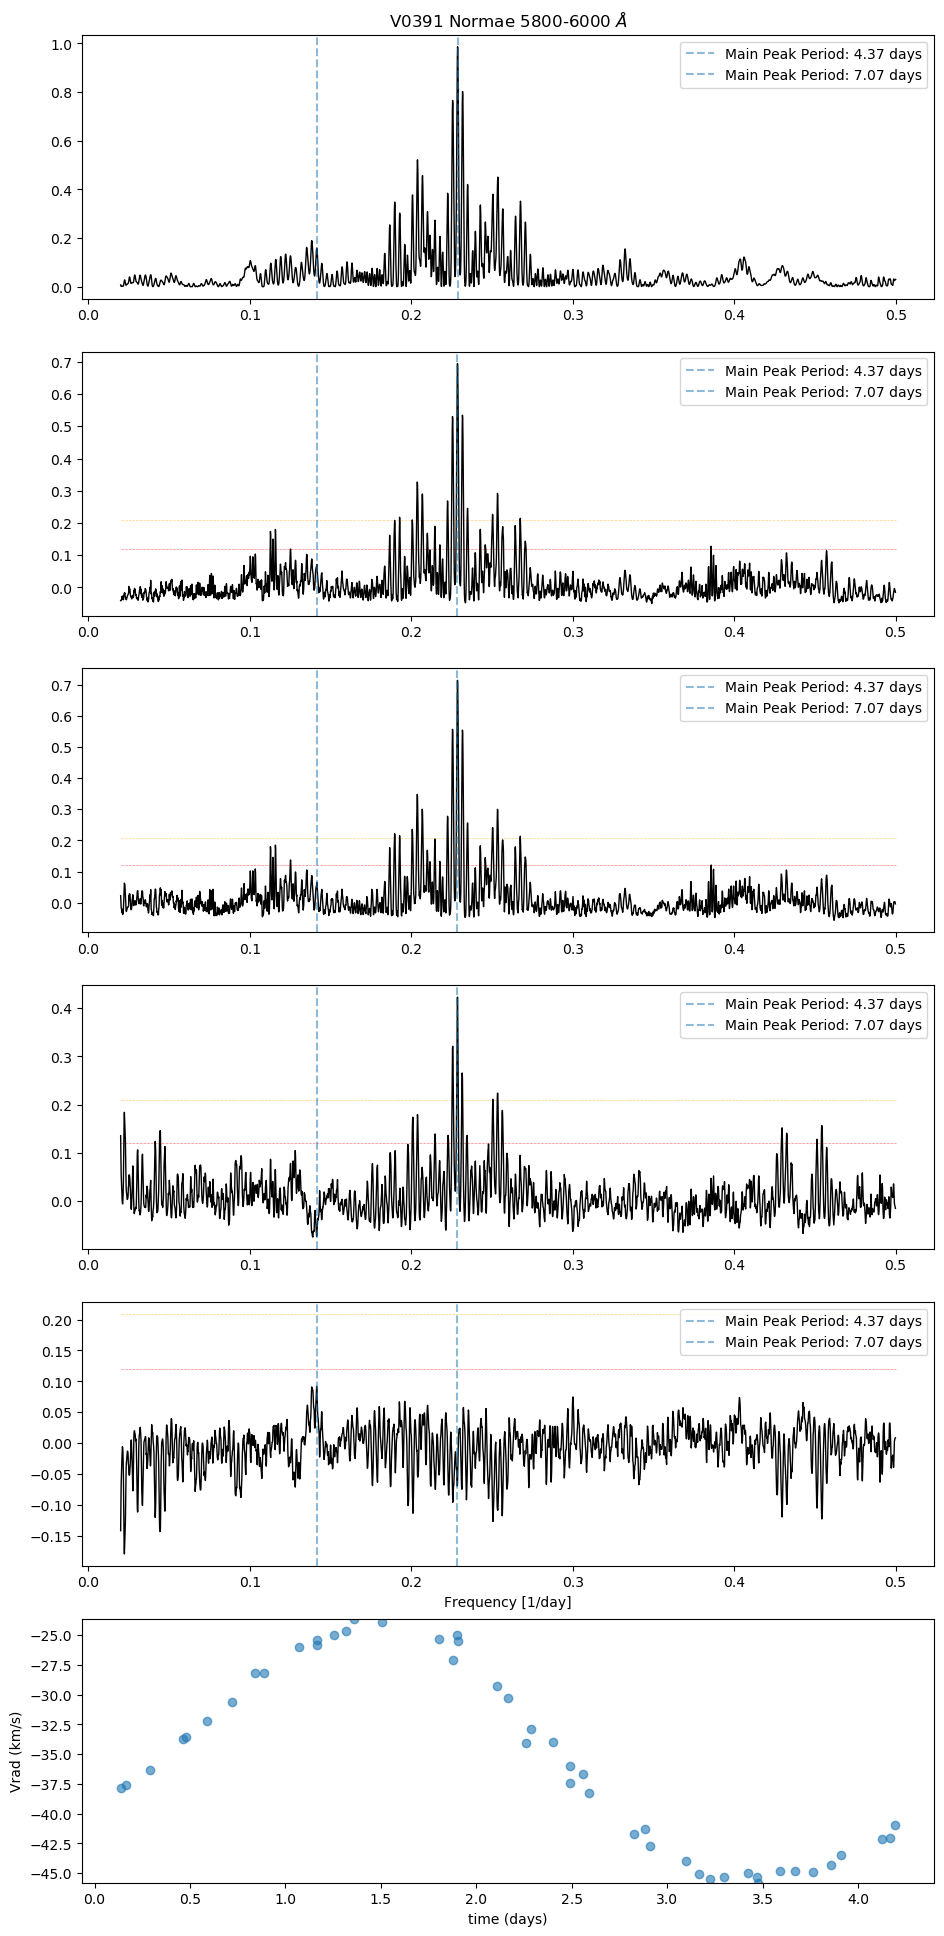

In [10]:
# plot the periodograms by opening the pickle file

file = open(r'C:\Users\kentb\Desktop\PDM\thesis\main\S1D\results\V03915800_6000.pkl', "rb")
obs_data = pickle.load(file)
file.close()

main_peak_shape = 1/check_for_other_signals(obs_data, 'shape_periodogram', max_m=4, max_n=2)[1]
main_peak_shift = 1/check_for_other_signals(obs_data, 'shift_periodogram', max_m=4, max_n=2)[1]

obs_data.periodicity_detector.period_truth = [main_peak_shape, main_peak_shift]

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"V0391 Normae 5800-6000 $\AA$")
plt.show()

In [2]:
test = Observations(survey="CORALIE", sample_rate=1, min_wv=3900, max_wv=6800,
                        target_visits_lib=r"C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru")

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru
Selected directory: C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru


In [3]:
print(test.spec_list[0].wv[0])

[3900.02 3900.04 3900.06 ... 6799.96 6799.98 6800.  ]


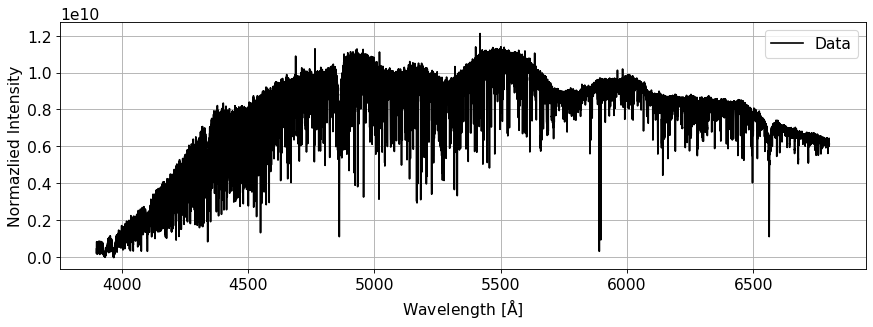

In [5]:
#Plot the resulting spectrum
max_wv = 6800
min_wv = 3900

wavelengths = test.spec_list[0].wv[0]

mask = (wavelengths >= min_wv) & (wavelengths <= max_wv)

plt.rcParams.update({'font.size': 14})

# plot order 0
plt.figure(figsize=(13, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.plot(test.spec_list[0].wv[0][mask], test.spec_list[0].sp[0][mask], 'k', label='Data')

plt.xlabel(r'Wavelength [${\rm \AA}$]')
plt.ylabel(r'Normazlied Intensity')
plt.legend()
plt.grid()

## All three stars with full spectrum

to do :

1. Improve peak finding routine, cleaning of periodogram ? 
2. Better peak fitting
3. Telluric (richard)
4. Wv ranges
5. Better examples(binaries) -> richard
6. In template.py, see air parameter.